# <b> Automatic Crypto Website API Pull

In [ ]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7f8741a2-d4bf-48c6-8a07-a9bb0f9ea8fc',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


#NOTE:

# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data.

# If that didn't work for you, try using the local host URL as shown in Anaconda Prompmt.


In [ ]:
type(data)

In [3]:

import pandas as pd

#This allows you to see all the columns, not just like 15

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:

#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp.now()
df


In [5]:

def api_runner():
        
    global df, data
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:

# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
# If that didn't work try using the local host URL.


    # Use this if you just want to keep it in a dataframe:
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.Timestamp.now()
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])

    # Use this if you want to create a csv and append data to it:
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp.now()
    df 
    
    if not os.path.isfile(r'C:\Users\SOHRAB KHAN\API.csv'):
        df.to_csv(r'C:\Users\SOHRAB KHAN\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\SOHRAB KHAN\API.csv', mode='a', header=False)
    
    
    #Then to read in the file: 
        
    df = pd.read_csv(r'C:\Users\SOHRAB KHAN\API.csv')


In [ ]:


import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()


In [ ]:
df

In [8]:

# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case:

pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [ ]:

df


In [ ]:

df3 = df.groupby('name', sort = False)['quote.USD.percent_change_1h', 'quote.USD.percent_change_7d'
                                       , 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d'
                                       , 'quote.USD.percent_change_90d'].mean()

df3


In [ ]:

df4 = df3.stack()
df4


In [ ]:

type(df4)


In [ ]:

df5 = df4.to_frame(name = 'values')
df5


In [ ]:

index = pd.Index(range(75))
                 
df6 = df5.reset_index()
df6


In [ ]:

df7 = df6.rename(columns = {'level_1' : 'percent_change'})
df7


In [ ]:

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h'
                                                       ,'quote.USD.percent_change_7d','quote.USD.percent_change_30d'
                                                       ,'quote.USD.percent_change_60d','quote.USD.percent_change_90d']
                                                      ,['1h', '24h','7d','30d','60d','90d'])

df7

In [18]:

import seaborn as sns
import matplotlib.pyplot as plt


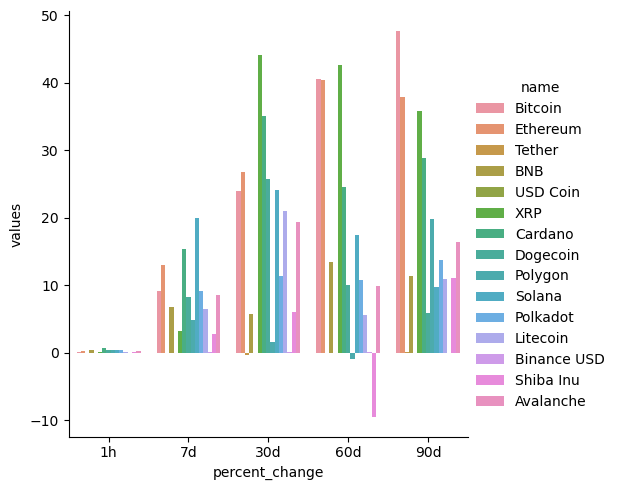

In [19]:

# Creating a Bar graph for Visualization: 

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='bar')
plt.show('bar')


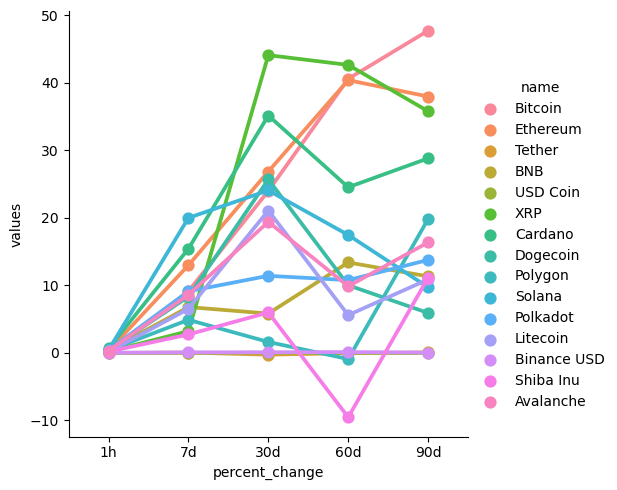

In [20]:

# Creating a Point graph for Visualization - Just to see the Difference:

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')
plt.show('point')


In [34]:

# Now to do something much simpler:
# we are going to create a dataframe with the columns we want:


df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'").head(5)
df10


,name,quote.USD.price,Timestamp
0,Bitcoin,30794.48384,2023-04-14 17:06:53.053514
15,Bitcoin,30794.48384,2023-04-14 17:06:53.053514
30,Bitcoin,30785.55998,2023-04-14 17:07:53.634167
45,Bitcoin,30785.55998,2023-04-14 17:07:53.634167
60,Bitcoin,30790.67223,2023-04-14 17:08:54.173687


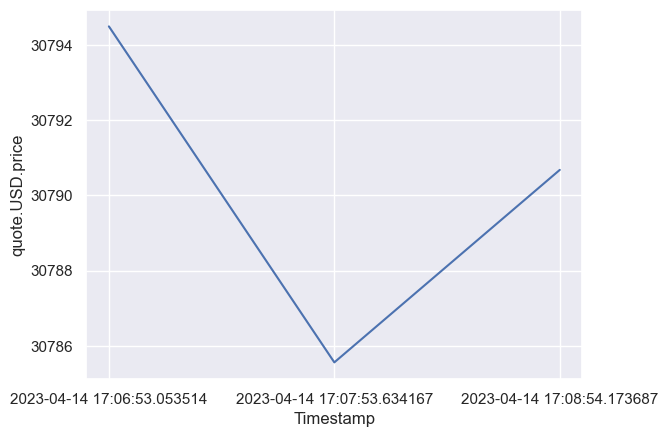

In [35]:

# Creating a line graph to track the changes:


sns.set_theme(style="darkgrid")
sns.lineplot(x = 'Timestamp', y = 'quote.USD.price', data = df10)
plt.show('line')
